In [25]:
from keras.applications import VGG19
conv_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## Fast feature extraction without data augmentation

In [26]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset"
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 30

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 3000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (3000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

Found 3000 images belonging to 2 classes.


2023-03-20 15:36:50.192018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 19ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 244ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 45ms/step


In [27]:
from keras import models
from keras import layers
from tensorflow.keras.optimizers.legacy import RMSprop

model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = RMSprop(learning_rate = 2e-5),
             loss ='binary_crossentropy',
             metrics=['acc'])

model_training = model.fit(train_features, train_labels,
                           epochs = 100,
                           batch_size=30,
                           validation_data=(validation_features, validation_labels))

Epoch 1/100


2023-03-20 15:41:04.915962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 98/100 [============================>.] - ETA: 0s - loss: 0.3689 - acc: 0.8412

2023-03-20 15:41:06.860770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 3s 18ms/step - loss: 0.3684 - acc: 0.8410 - val_loss: 0.2646 - val_acc: 0.8830
Epoch 2/100
100/100 [==============================] - 1s 13ms/step - loss: 0.2324 - acc: 0.9153 - val_loss: 0.2182 - val_acc: 0.9020
Epoch 3/100
100/100 [==============================] - 1s 13ms/step - loss: 0.2060 - acc: 0.9177 - val_loss: 0.2168 - val_acc: 0.9010
Epoch 4/100
100/100 [==============================] - 1s 13ms/step - loss: 0.1868 - acc: 0.9303 - val_loss: 0.1909 - val_acc: 0.9230
Epoch 5/100
100/100 [==============================] - 1s 13ms/step - loss: 0.1754 - acc: 0.9323 - val_loss: 0.1818 - val_acc: 0.9270
Epoch 6/100
100/100 [==============================] - 1s 13ms/step - loss: 0.1652 - acc: 0.9387 - val_loss: 0.1759 - val_acc: 0.9290
Epoch 7/100
100/100 [==============================] - 1s 12ms/step - loss: 0.1575 - acc: 0.9407 - val_loss: 0.1831 - val_acc: 0.9250
Epoch 8/100
100/100 [==============================] - 1s 12ms/step - loss

Epoch 62/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0613 - acc: 0.9793 - val_loss: 0.1585 - val_acc: 0.9450
Epoch 63/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0597 - acc: 0.9803 - val_loss: 0.1406 - val_acc: 0.9470
Epoch 64/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0594 - acc: 0.9810 - val_loss: 0.1379 - val_acc: 0.9520
Epoch 65/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0582 - acc: 0.9813 - val_loss: 0.1362 - val_acc: 0.9550
Epoch 66/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0572 - acc: 0.9840 - val_loss: 0.1355 - val_acc: 0.9550
Epoch 67/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0555 - acc: 0.9817 - val_loss: 0.1454 - val_acc: 0.9480
Epoch 68/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0559 - acc: 0.9840 - val_loss: 0.1400 - val_acc: 0.9500
Epoch 69/100
100/100 [==============================] -

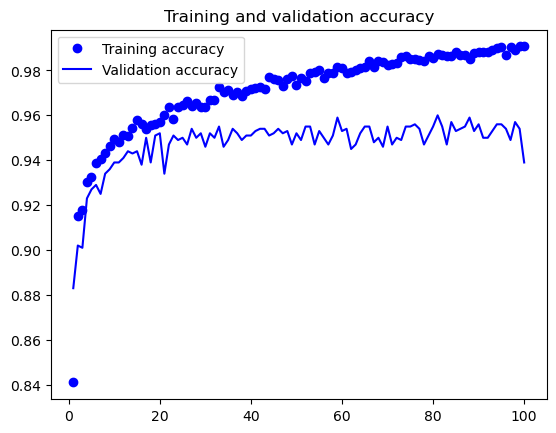

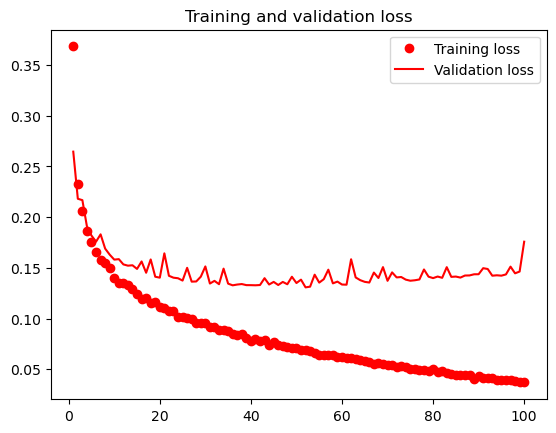

In [28]:
import matplotlib.pyplot as plt

acc = model_training.history['acc']
val_acc = model_training.history['val_acc']
loss = model_training.history['loss']
val_loss = model_training.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Feature extraction (transfer learning) with augmentation

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

conv_base.trainable = False

In [30]:
#POKRENI PONOVO

from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset"
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')


train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  zoom_range=0.1,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='binary')

model.compile(optimizer = RMSprop(learning_rate = 2e-5),
             loss ='binary_crossentropy',
             metrics=['acc'])

model_training = model.fit(train_generator,
                           steps_per_epoch=100,
                           epochs = 100,
                           validation_data=validation_generator,
                           validation_steps = 33)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


2023-03-20 15:47:42.150559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.3823 - acc: 0.8363

2023-03-20 15:48:28.426030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 62s 610ms/step - loss: 0.3823 - acc: 0.8363 - val_loss: 0.2813 - val_acc: 0.8747
Epoch 2/100
100/100 [==============================] - 74s 735ms/step - loss: 0.2832 - acc: 0.8827 - val_loss: 0.2417 - val_acc: 0.8929
Epoch 3/100
100/100 [==============================] - 76s 762ms/step - loss: 0.2615 - acc: 0.8930 - val_loss: 0.2205 - val_acc: 0.9071
Epoch 4/100
100/100 [==============================] - 77s 768ms/step - loss: 0.2381 - acc: 0.9073 - val_loss: 0.2117 - val_acc: 0.9101
Epoch 5/100
100/100 [==============================] - 79s 786ms/step - loss: 0.2302 - acc: 0.9083 - val_loss: 0.2100 - val_acc: 0.9162
Epoch 6/100
100/100 [==============================] - 78s 783ms/step - loss: 0.2317 - acc: 0.9090 - val_loss: 0.2117 - val_acc: 0.9212
Epoch 7/100
100/100 [==============================] - 79s 789ms/step - loss: 0.2123 - acc: 0.9143 - val_loss: 0.2360 - val_acc: 0.9081
Epoch 8/100
100/100 [==============================] - 79s 7

Epoch 61/100
100/100 [==============================] - 71s 708ms/step - loss: 0.1359 - acc: 0.9490 - val_loss: 0.1408 - val_acc: 0.9434
Epoch 62/100
100/100 [==============================] - 71s 708ms/step - loss: 0.1347 - acc: 0.9500 - val_loss: 0.1444 - val_acc: 0.9404
Epoch 63/100
100/100 [==============================] - 72s 712ms/step - loss: 0.1338 - acc: 0.9490 - val_loss: 0.1475 - val_acc: 0.9414
Epoch 64/100
100/100 [==============================] - 73s 723ms/step - loss: 0.1330 - acc: 0.9513 - val_loss: 0.1216 - val_acc: 0.9545
Epoch 65/100
100/100 [==============================] - 73s 724ms/step - loss: 0.1402 - acc: 0.9490 - val_loss: 0.1309 - val_acc: 0.9475
Epoch 66/100
100/100 [==============================] - 72s 722ms/step - loss: 0.1412 - acc: 0.9460 - val_loss: 0.1399 - val_acc: 0.9434
Epoch 67/100
100/100 [==============================] - 72s 715ms/step - loss: 0.1389 - acc: 0.9487 - val_loss: 0.1492 - val_acc: 0.9414
Epoch 68/100
100/100 [===================

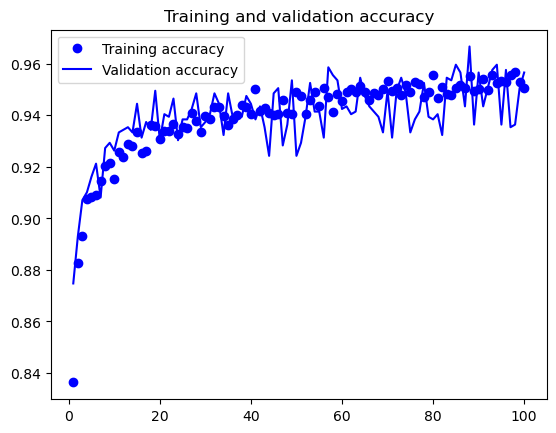

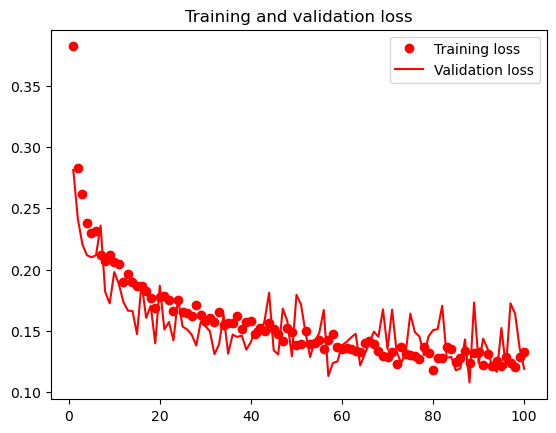

In [31]:
import matplotlib.pyplot as plt

acc = model_training.history['acc']
val_acc = model_training.history['val_acc']
loss = model_training.history['loss']
val_loss = model_training.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Fine-tuning

In [32]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

from tensorflow.keras.optimizers.legacy import RMSprop
        
model.compile(optimizer = RMSprop(learning_rate = 1e-5),
             loss ='binary_crossentropy',
             metrics=['acc'])

model_training = model.fit(train_generator,
                           steps_per_epoch=100,
                           epochs = 100,
                           validation_data=validation_generator,
                           validation_steps = 33)


Epoch 1/100


2023-03-20 17:59:08.941955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.1590 - acc: 0.9403

2023-03-20 18:00:04.284685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 72s 713ms/step - loss: 0.1590 - acc: 0.9403 - val_loss: 0.1598 - val_acc: 0.9434
Epoch 2/100
100/100 [==============================] - 84s 834ms/step - loss: 0.1435 - acc: 0.9470 - val_loss: 0.1419 - val_acc: 0.9485
Epoch 3/100
100/100 [==============================] - 85s 843ms/step - loss: 0.1299 - acc: 0.9523 - val_loss: 0.1396 - val_acc: 0.9495
Epoch 4/100
100/100 [==============================] - 84s 833ms/step - loss: 0.1094 - acc: 0.9577 - val_loss: 0.1601 - val_acc: 0.9465
Epoch 5/100
100/100 [==============================] - 83s 831ms/step - loss: 0.1069 - acc: 0.9593 - val_loss: 0.1216 - val_acc: 0.9636
Epoch 6/100
100/100 [==============================] - 85s 844ms/step - loss: 0.1069 - acc: 0.9603 - val_loss: 0.1395 - val_acc: 0.9545
Epoch 7/100
100/100 [==============================] - 87s 872ms/step - loss: 0.0932 - acc: 0.9643 - val_loss: 0.1330 - val_acc: 0.9545
Epoch 8/100
100/100 [==============================] - 93s 9

Epoch 61/100
100/100 [==============================] - 83s 824ms/step - loss: 0.0107 - acc: 0.9960 - val_loss: 0.2473 - val_acc: 0.9556
Epoch 62/100
100/100 [==============================] - 90s 901ms/step - loss: 0.0116 - acc: 0.9950 - val_loss: 0.5220 - val_acc: 0.9253
Epoch 63/100
100/100 [==============================] - 91s 904ms/step - loss: 0.0210 - acc: 0.9947 - val_loss: 0.4277 - val_acc: 0.9273
Epoch 64/100
100/100 [==============================] - 90s 897ms/step - loss: 0.0117 - acc: 0.9960 - val_loss: 0.3359 - val_acc: 0.9515
Epoch 65/100
100/100 [==============================] - 91s 905ms/step - loss: 0.0143 - acc: 0.9943 - val_loss: 0.4842 - val_acc: 0.9283
Epoch 66/100
100/100 [==============================] - 85s 843ms/step - loss: 0.0120 - acc: 0.9957 - val_loss: 0.3667 - val_acc: 0.9465
Epoch 67/100
100/100 [==============================] - 83s 827ms/step - loss: 0.0096 - acc: 0.9957 - val_loss: 0.5072 - val_acc: 0.9253
Epoch 68/100
100/100 [===================

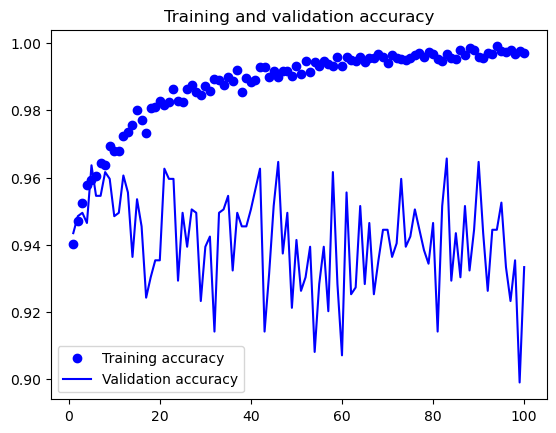

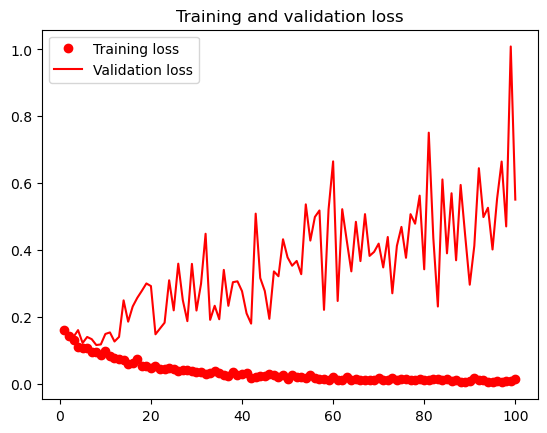

In [33]:
import matplotlib.pyplot as plt

acc = model_training.history['acc']
val_acc = model_training.history['val_acc']
loss = model_training.history['loss']
val_loss = model_training.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()